# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and label them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the dataset from [here](https://drive.google.com/file/d/18LRRR60T-7NbUeZPCSI1crjo8O3LeGhc/view?usp=sharing), place it in the data folder and load it in variable `websites`

In [2]:
websites = pd.read_csv('../data/website.csv',sep=',')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [5]:
websites[["URL","CHARSET","WHOIS_COUNTRY","WHOIS_STATEPRO"]]

,URL,CHARSET,WHOIS_COUNTRY,WHOIS_STATEPRO
0,M0_109,iso-8859-1,None,None
1,B0_2314,UTF-8,None,None
2,B0_911,us-ascii,None,None
3,B0_113,ISO-8859-1,US,AK
4,B0_403,UTF-8,US,TX
...,...,...,...,...
1776,M4_48,UTF-8,ES,Barcelona
1777,M4_41,UTF-8,ES,Barcelona
1778,B0_162,utf-8,US,FL
1779,B0_1152,ISO-8859-1,US,CA


In [6]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
websites.Type.unique() # Categorical column

array([1, 0], dtype=int64)

In [8]:
#Your comment here
    
# WHOIS_REGDATE and WHOIS_UPDATED_DATE might be datetime, the rest looks OK.
# Categorical: "URL","CHARSET","WHOIS_COUNTRY","WHOIS_STATEPRO"
# Type column is the target column. It is probably the column tha shows website is malicious 
# or not.# And this will be the column we will try to guess.

# Is type column can also be interpret as categorical column?

In [9]:
# Checking missing columns
for column in websites.columns:
    print(f"{column} has {websites[column].isna().sum()} missing values.")

URL has 0 missing values.
URL_LENGTH has 0 missing values.
NUMBER_SPECIAL_CHARACTERS has 0 missing values.
CHARSET has 0 missing values.
SERVER has 1 missing values.
CONTENT_LENGTH has 812 missing values.
WHOIS_COUNTRY has 0 missing values.
WHOIS_STATEPRO has 0 missing values.
WHOIS_REGDATE has 0 missing values.
WHOIS_UPDATED_DATE has 0 missing values.
TCP_CONVERSATION_EXCHANGE has 0 missing values.
DIST_REMOTE_TCP_PORT has 0 missing values.
REMOTE_IPS has 0 missing values.
APP_BYTES has 0 missing values.
SOURCE_APP_PACKETS has 0 missing values.
REMOTE_APP_PACKETS has 0 missing values.
SOURCE_APP_BYTES has 0 missing values.
REMOTE_APP_BYTES has 0 missing values.
APP_PACKETS has 0 missing values.
DNS_QUERY_TIMES has 1 missing values.
Type has 0 missing values.


#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [10]:
# Your code here
websites_numeric = websites._get_numeric_data()
websites_numeric.drop(columns="Type",axis=1,inplace=True)
websites_numeric.head(3)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0


In [11]:
websites_numeric.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285


<AxesSubplot:>

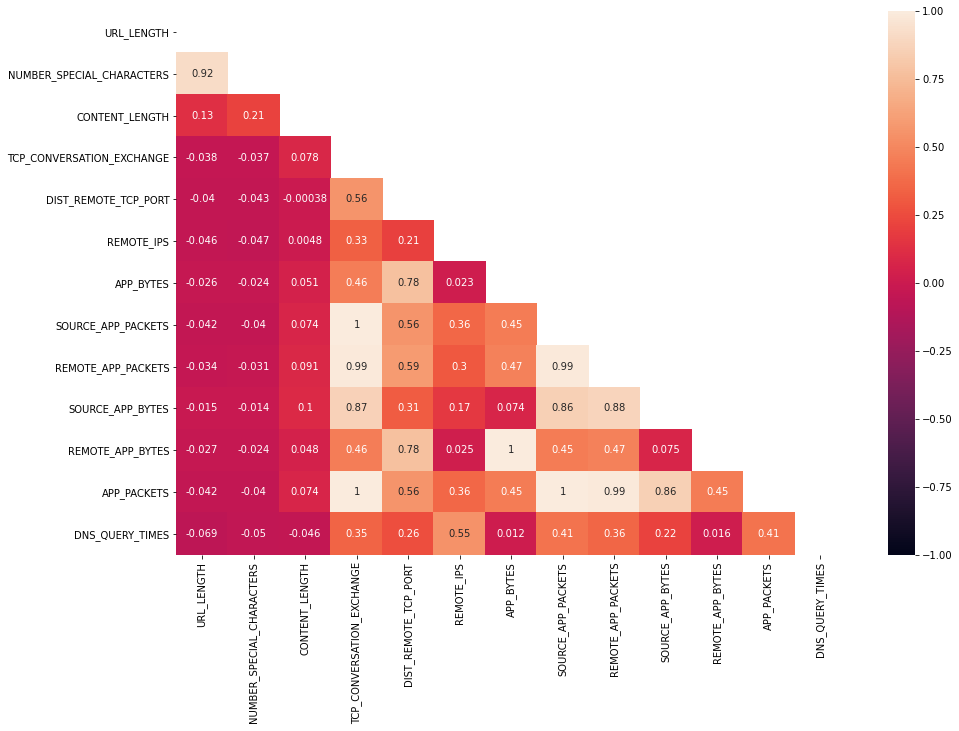

In [12]:
plt.rcParams["figure.figsize"]=(15,10)
mask = np.zeros_like(websites_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(websites_numeric.corr(),vmin=-1,vmax=1,annot=True,mask=mask)

In [13]:
# Your comment here

# Highly correlated columns:

# 1- NUMBER_SPECIAL_CHARACTERS & URL_LENGTH
# 2- SOURCE_APP_PACKETS & TCP_CONVERSATION_EXCHANGE ---> MAX = 1
# 3- REMOTE_APP_PACKETS & TCP_CONVERSATION_EXCHANGE ---> ALMOST MAX = 0.99
# 4- SOURCE_APP_BYTES & TCP_CONSERVATION_EXCHANGE
# 5- APP_PACKETS & & TCP_CONVERSATION_EXCHANGE --------> MAX = 1
# 6- REMOTE_APP_BYTES & DIST_REMOTE_TCP_PORT
# 6- REMOTE_APP_BYTES & APP_BYTES --------------------> MAX =1
# 7- REMOTE_APP_PACKETS & SOURCE_APP_PACKETS
# 8- SOURCE_APP_BYTES & SOURCE_APP_PACKETS
# 9- APP_PACKETS & SOURCE_APP_PACKETS ---------------> MAX = 1
# 10- APP_PACKETS & REMOTE_APP_PACKETS --------------> ALMOST MAX = 0.99
# 11- APP_PACKETS & SOURCE_APP_BYTES

# IN TOTAL 9 COLUMNS WITH CORRELATION MORE THAN 90%

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [14]:
# Your comment here
# Based on above correlation results, TCP_CONSERVATION_EXCHANGE has the highest frequency in 
# correlation results, so I will start by excluding it, its effect will be much higher compared to
# other columns.

# I will follow the below order for elimination due to their number of occurences in multi-colli.
# 1) TCP_CONVERVSATION_EXCHANGE (4 times), APP_PACKETS (3 times) - 1 one each other.

In [15]:
websites_numeric.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES'],
      dtype='object')

<AxesSubplot:>

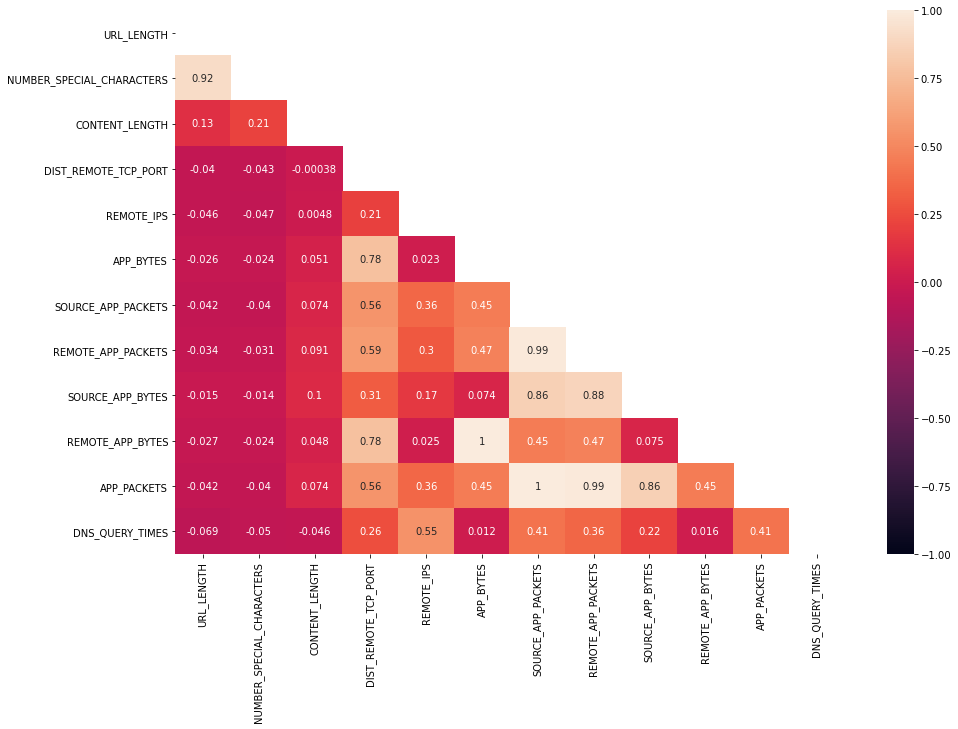

In [16]:
# Your code here
websites_numeric_wo_TCP_CONVERSATION_EXCHANGE = websites_numeric.copy()
websites_numeric_wo_TCP_CONVERSATION_EXCHANGE.drop(columns="TCP_CONVERSATION_EXCHANGE",axis=1,inplace=True)

mask = np.zeros_like(websites_numeric_wo_TCP_CONVERSATION_EXCHANGE.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(websites_numeric_wo_TCP_CONVERSATION_EXCHANGE.corr(),vmin=-1,vmax=1,annot=True,mask=mask)

In [17]:
# Your comment here
# IN TOTAL 5 COLUMNS LEFT WITH CORRELATION MORE THAN 90%. PREVIOUSLY IT WAS 9.
# Left ones:

# 1- NUMBER_SPECIAL_CHARACTERS & URL_LENGTH
# 2- REMOTE_APP_BYTES & APP_BYTES
# 3- APP_PACKETS & SOURCE_APP_PACKETS
# 4- APP_PACKETS & REMOTE_APP PACKETS'
# 5- REMOTE_APP_PACKETS & SOURCE_APP_PACKETS

# Removing APP_PACKETS now since this feature has more corr. (2 corr. problems with this feature)

<AxesSubplot:>

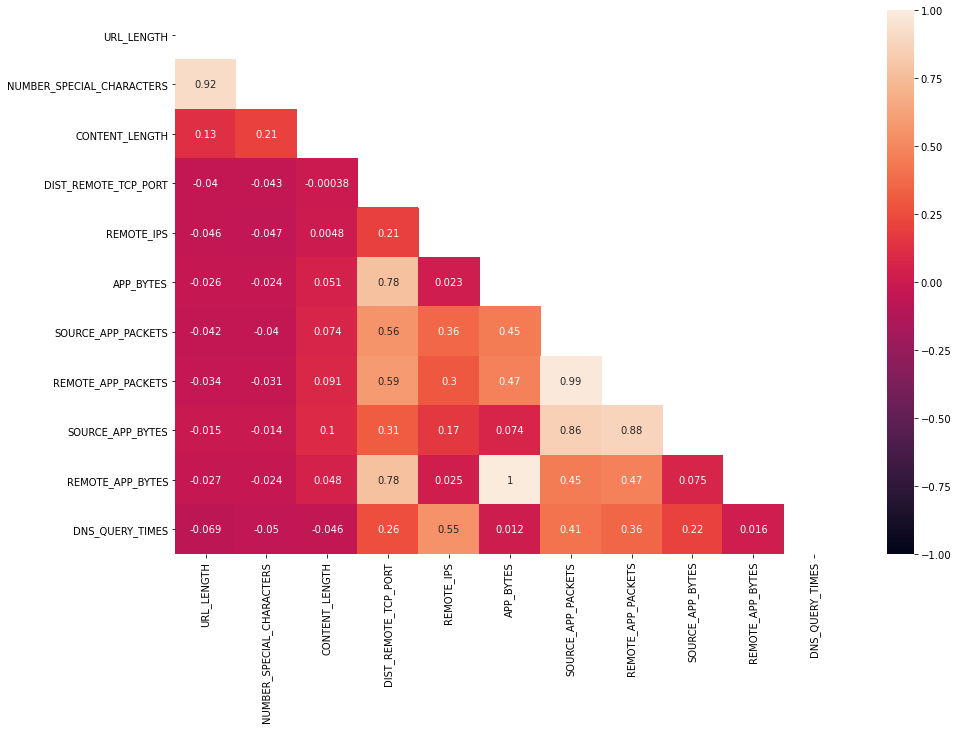

In [18]:
# Print heatmap again
websites_numeric_wo_TCE_and_APP_PACKETS = websites_numeric_wo_TCP_CONVERSATION_EXCHANGE.copy()
websites_numeric_wo_TCE_and_APP_PACKETS.drop(columns="APP_PACKETS",axis=1,inplace=True)

mask = np.zeros_like(websites_numeric_wo_TCE_and_APP_PACKETS.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(websites_numeric_wo_TCE_and_APP_PACKETS.corr(),vmin=-1,vmax=1,annot=True,mask=mask)

In [19]:
# Well, we still have high correlation between:
# 1- NUMBER_SPECIAL_CHARACTERS & URL_LENGTH
# 2- REMOTE_APP_BYTES & APP_BYTES
# 3- REMOTE_APP_PACKETS & SOURCE_APP_PACKETS

# In order to remove last 3 correlations, we have to remove at least 3 features since eacho of them
# belongs to two different feature.

# So below 3 letter pairs, we have to remove 3 of them.
# a1- NUMBER_SPECIAL_CHARACTERS
# a2- URL_LENGTH
# b1- REMOTE_APP_BYTES
# b2- APP_BYTES
# c1- REMOTE_APP_PACKETS
# c2- SOURCE_APP_PACKETS

In [20]:
# checking data to determine which can be excluded

websites[["NUMBER_SPECIAL_CHARACTERS","URL_LENGTH","REMOTE_APP_BYTES","APP_BYTES",
          "REMOTE_APP_PACKETS","SOURCE_APP_PACKETS"]]

# If I know the terminology, maybe it would be easier to keep which and what, but just looking below;

# Between a1 and a2, I will go by keeping a2 - URL_LENGTH since I believe number_special_characters
# are already counted in this column so we can continue with URL_LENGTH.
# --- BUT, also number of special characters is more narrow information rather than URL_Length, so
# this feature might actually give more insights for prediction. But still I will go with the column
# that include more general information - URL_LENGTH

# Between b1 and b2, I will keep b2 which is APP_BYTES- this is also because of the same reason,
# Looks like app_bytes column is more generalized than remote_app_bytes.

# Between c1 and c2,I have no idea but after checking last correlation heatmap, all of below
# features correlation with other features in the dataset is quite close to each other, which 
# is normal since below are highly correlated with each other (this also lead similar corr. with other
# features for each of them) so at this point I believe excluding one of them from below pairs is OK.

,NUMBER_SPECIAL_CHARACTERS,URL_LENGTH,REMOTE_APP_BYTES,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS
0,7,16,832,700,10,9
1,6,16,1230,1230,19,17
2,6,16,0,0,0,0
3,6,17,4380,3812,37,39
4,6,17,4586,4278,62,61
...,...,...,...,...,...,...
1776,16,194,0,0,3,0
1777,17,198,0,0,2,0
1778,34,201,6945,6631,89,87
1779,34,234,0,0,0,0


<AxesSubplot:>

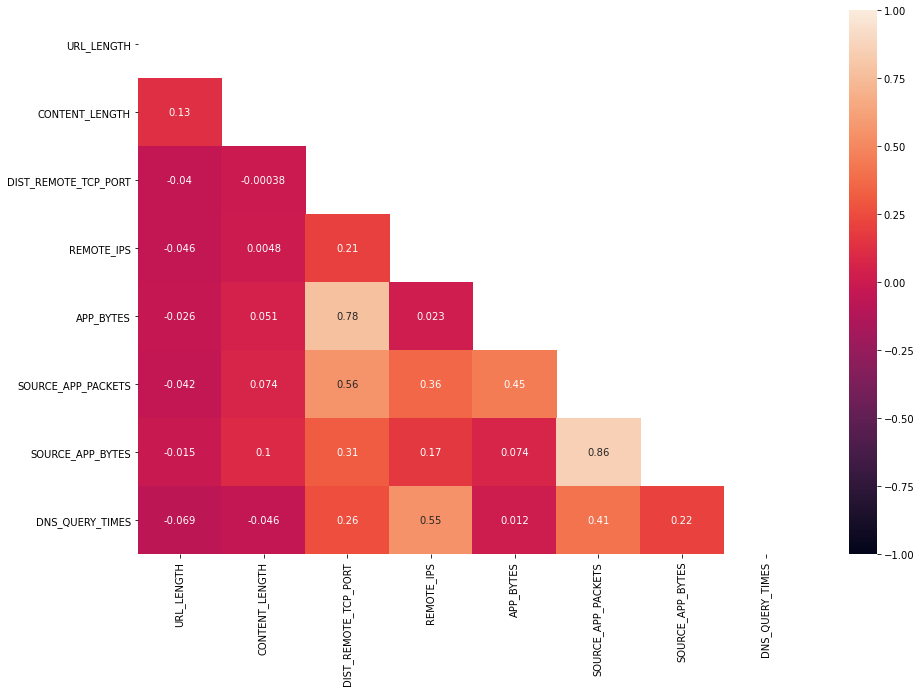

In [21]:
websites_numeric_corr_fixed = websites_numeric_wo_TCE_and_APP_PACKETS.copy()
drop_columns = ["NUMBER_SPECIAL_CHARACTERS","REMOTE_APP_BYTES","REMOTE_APP_PACKETS"]
websites_numeric_corr_fixed.drop(columns=drop_columns,axis=1,inplace=True)

mask = np.zeros_like(websites_numeric_corr_fixed.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(websites_numeric_corr_fixed.corr(),vmin=-1,vmax=1,annot=True,mask=mask)

In [22]:
# Looks like we now have quite OK table in terms of multi-collinearity but there are still 2 cells
# which might need to be investigated further due to their high correlations.(0.78 and 0.86)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [23]:
# Your code here

# First I have to merge websites dataset with multi-collinearity fixed dataset.
websites.drop(columns=websites_numeric.columns,axis=1,inplace=True)
websites_corr_fixed = pd.merge(websites,websites_numeric_corr_fixed,left_index=True,
                              right_index = True)
websites_corr_fixed.head()

# Looks OK.

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,Type,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES
0,M0_109,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,1,16,263.0,0,2,700,9,1153,2.0
1,B0_2314,UTF-8,Apache/2.4.10,None,None,None,None,0,16,15087.0,7,4,1230,17,1265,0.0
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,16,324.0,0,0,0,0,0,0.0
3,B0_113,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,0,17,162.0,22,3,3812,39,18784,8.0
4,B0_403,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,0,17,124140.0,2,5,4278,61,129889,4.0


In [24]:
# Checking missing columns
for column in websites_corr_fixed:
    print(f"{column} has {websites_corr_fixed[column].isna().sum()} missing values.")
    
# CONTENT_LENGTH has 812 columns. Let's look it's ratio.

missing_perc_content_length = (websites_corr_fixed["CONTENT_LENGTH"].isna().sum()/len(websites_corr_fixed["CONTENT_LENGTH"]))*100

print("\nMissing ratio in Content_Lenghth column is: ",missing_perc_content_length)

# 45%! This needs to be fixed since threshold for such situation is around 8/10% based on dataset.

URL has 0 missing values.
CHARSET has 0 missing values.
SERVER has 1 missing values.
WHOIS_COUNTRY has 0 missing values.
WHOIS_STATEPRO has 0 missing values.
WHOIS_REGDATE has 0 missing values.
WHOIS_UPDATED_DATE has 0 missing values.
Type has 0 missing values.
URL_LENGTH has 0 missing values.
CONTENT_LENGTH has 812 missing values.
DIST_REMOTE_TCP_PORT has 0 missing values.
REMOTE_IPS has 0 missing values.
APP_BYTES has 0 missing values.
SOURCE_APP_PACKETS has 0 missing values.
SOURCE_APP_BYTES has 0 missing values.
DNS_QUERY_TIMES has 1 missing values.

Missing ratio in Content_Lenghth column is:  45.59236384053902


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [25]:
# Your code here
websites_corr_fixed = websites_corr_fixed.drop(columns="CONTENT_LENGTH",axis=1)
# Besides that we have 1 missing value in DNS_QUERY_TIMES row and 1 in SERVER row.
websites_corr_fixed[["DNS_QUERY_TIMES","SERVER"]]

,DNS_QUERY_TIMES,SERVER
0,2.0,nginx
1,0.0,Apache/2.4.10
2,0.0,Microsoft-HTTPAPI/2.0
3,8.0,nginx
4,4.0,None
...,...,...
1776,0.0,Apache
1777,0.0,Apache
1778,4.0,Apache/2.2.16 (Debian)
1779,0.0,cloudflare-nginx


In [26]:
# Maybe this features can be estimated by someone who is familiar with the terms but for now I will
# remove that two rows from the dataset. Also interpolation is not possible for DNS column since
# data is not a time series.

In [27]:
# Your comment here
websites_corr_fixed[websites_corr_fixed["DNS_QUERY_TIMES"].isna()==True].index #index no 1659
websites_corr_fixed[websites_corr_fixed["SERVER"].isna()==True].index #index no 1306

websites_corr_fixed[["DNS_QUERY_TIMES","SERVER"]].iloc[[1659],:]

print("Dataset shape before removing: ",websites_corr_fixed.shape) # 2 should be removed.
# removing directly NaN rows, no need to indexes at all.
websites_corr_fixed.dropna(inplace=True)
print("Dataset shape after removing: ",websites_corr_fixed.shape)

Dataset shape before removing:  (1781, 15)
Dataset shape after removing:  (1779, 15)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [28]:
# Examine missing values in each column
for column in websites_corr_fixed:
    print(f"{column} has {websites_corr_fixed[column].isna().sum()} missing values.")
    
# Looks cleaning is completed.

URL has 0 missing values.
CHARSET has 0 missing values.
SERVER has 0 missing values.
WHOIS_COUNTRY has 0 missing values.
WHOIS_STATEPRO has 0 missing values.
WHOIS_REGDATE has 0 missing values.
WHOIS_UPDATED_DATE has 0 missing values.
Type has 0 missing values.
URL_LENGTH has 0 missing values.
DIST_REMOTE_TCP_PORT has 0 missing values.
REMOTE_IPS has 0 missing values.
APP_BYTES has 0 missing values.
SOURCE_APP_PACKETS has 0 missing values.
SOURCE_APP_BYTES has 0 missing values.
DNS_QUERY_TIMES has 0 missing values.


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [29]:
websites_categorical = websites_corr_fixed.copy()

In [30]:
# Your code here
websites_categorical["WHOIS_COUNTRY"].unique()
# I will keep None rows for now, that might be predicted/deleted if it has a high proportion..

# se = SE
# [u'GB'; u'UK'] = GB
# ru = RU
# us = US
# United Kingdom = GB
# Cyprus = CY

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [31]:
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('us','US')
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('se','SE')
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('ru','RU')
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('United Kingdom','GB')
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('Cyprus',"CY")
# It's interesting, somehow a new value occurs called 'CyprUS' in the dataset, don't get it.. will 
# it again.
websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace('CyprUS','CY')

websites_categorical["WHOIS_COUNTRY"] = websites_categorical["WHOIS_COUNTRY"].str.replace("[\(\[].*?[\)\]]",'GB')

In [32]:
websites_categorical["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<AxesSubplot:xlabel='WHOIS_COUNTRY', ylabel='Count'>

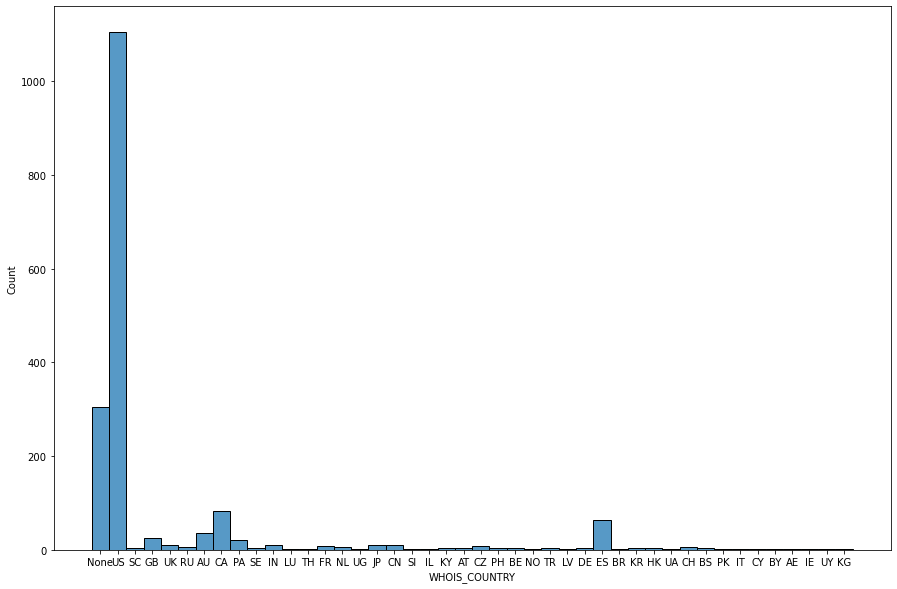

In [33]:
# Your code here
sns.histplot(data=websites_categorical,x="WHOIS_COUNTRY")

In [34]:
# I will drop None rows since I have missed this part during cleaning the dataset.

idx_none = websites_categorical[websites_categorical["WHOIS_COUNTRY"] =="None"].index

websites_categorical.drop(idx_none,axis=0,inplace=True)
websites_categorical["WHOIS_COUNTRY"].value_counts().head(10)

US    1105
CA      83
ES      63
AU      35
GB      25
PA      21
JP      11
CN      10
UK      10
IN      10
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [35]:
# Removing top ten countries from all_cts list and labelin them as 'OTHER'
top_ten_ct = websites_categorical["WHOIS_COUNTRY"].value_counts().head(10).index
all_cts = websites_categorical["WHOIS_COUNTRY"].unique()

# removing top ten countries from the list
other_cts= list(set(all_cts).difference(set(top_ten_ct)))

# using that list to find index number of other countries
idx_others=[]
for x in range(len(other_cts)):
    idx_no = websites_categorical[websites_categorical["WHOIS_COUNTRY"] == other_cts[x]].index
    a = [idx_no for idx_no in idx_no]
    idx_others.append(a)

# storing other countires idx numbers
idxs = [idx_others for idx_others in idx_others for idx_others in idx_others]

# RE-labeling other countries as OTHER
for idx_number in idxs:
    ct_name_to_be_replaced = websites_categorical.loc[idx_number,"WHOIS_COUNTRY"]
    websites_categorical.loc[idx_number,"WHOIS_COUNTRY"] = websites_categorical.loc[
        idx_number,"WHOIS_COUNTRY"].replace(ct_name_to_be_replaced,"OTHER")

<AxesSubplot:xlabel='WHOIS_COUNTRY', ylabel='Count'>

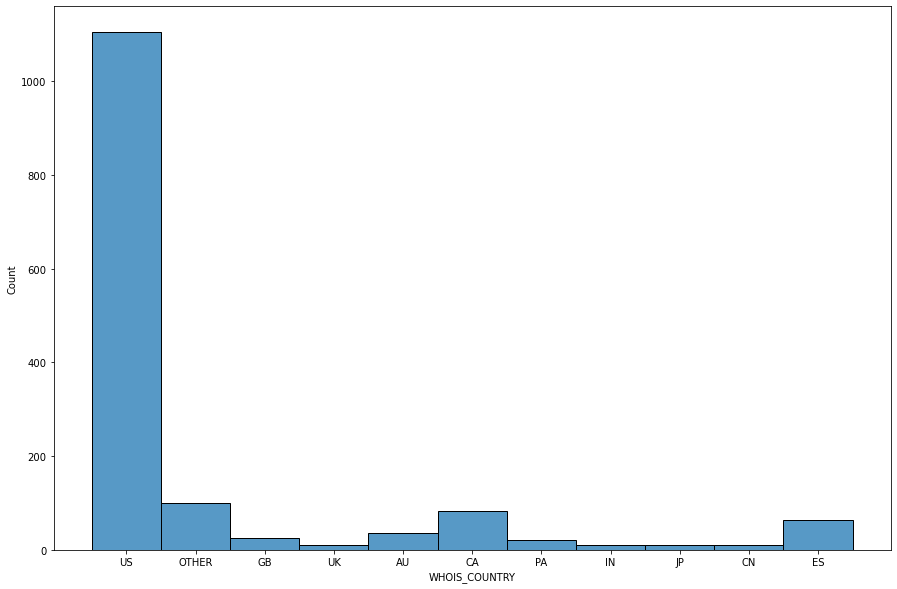

In [36]:
# Rechecking barplot
sns.histplot(data=websites_categorical,x="WHOIS_COUNTRY")

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [37]:
# Your code here
websites_categorical.drop(columns =["WHOIS_STATEPRO","WHOIS_REGDATE","WHOIS_UPDATED_DATE"],axis=1,
                         inplace=True)
websites_categorical.head(3)

,URL,CHARSET,SERVER,WHOIS_COUNTRY,Type,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES
3,B0_113,ISO-8859-1,nginx,US,0,17,22,3,3812,39,18784,8.0
4,B0_403,UTF-8,None,US,0,17,2,5,4278,61,129889,4.0
5,B0_2064,UTF-8,nginx,OTHER,0,18,6,9,894,11,838,0.0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [38]:
# Your code here
websites_categorical.dtypes

URL                      object
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
Type                      int64
URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_PACKETS        int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [39]:
# Your code here
websites_categorical.drop(columns="URL",axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [40]:
# Your code here
websites_categorical["CHARSET"].unique()

# dropping None values for CHARSET
idx_none = websites_categorical[websites_categorical["CHARSET"] =="None"].index
websites_categorical.drop(idx_none,axis=0,inplace=True)
websites_categorical["CHARSET"].value_counts().head(10)

UTF-8           563
ISO-8859-1      364
utf-8           322
us-ascii        121
iso-8859-1       94
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [41]:
# Your code here
websites_categorical["SERVER"].unique()

array(['nginx', 'None', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'openresty', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.10 (Debian)', 'Apache/2.4.6 (CentOS) PHP/5.6.8',
       'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apach

In [42]:
# Your comment here
# I guess we only need first part of the words for Servers which are Apache,Microsoft etc. so with
# regex we can scrap those ones. There are maybe 7-8 servers in total i guess,

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [43]:
server_list = ["Microsoft","Apache","nginx"]

# renaming microsoft, apache and nginx by finding their index numbers first and then renaming.
for server in server_list:
    idx = websites_categorical[websites_categorical["SERVER"].str.contains(server) == True].index
    websites_categorical.loc[idx,"SERVER"] = server
    
# finding index number of other servers except Microsoft, Apache and nginx
other_index = websites_categorical[(websites_categorical["SERVER"] !="Apache") & 
                    (websites_categorical["SERVER"]!="Microsoft") &
                     (websites_categorical["SERVER"]!="nginx")].index

# renaming those servers as "OTHER"
for index in other_index:
    websites_categorical.loc[index,"SERVER"] = "OTHER"

websites_categorical["SERVER"].unique()

array(['nginx', 'OTHER', 'Apache', 'Microsoft'], dtype=object)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [44]:
# Your code here
website_dummy = pd.get_dummies(websites_categorical,drop_first=True)

In [45]:
website_dummy.columns

# No none values, all categorized data is converted.

Index(['Type', 'URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES',
       'CHARSET_UTF-8', 'CHARSET_iso-8859-1', 'CHARSET_us-ascii',
       'CHARSET_utf-8', 'CHARSET_windows-1251', 'CHARSET_windows-1252',
       'SERVER_Microsoft', 'SERVER_OTHER', 'SERVER_nginx', 'WHOIS_COUNTRY_CA',
       'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_GB',
       'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_OTHER',
       'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [46]:
# Your code here
website_dummy

,Type,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,CHARSET_UTF-8,CHARSET_iso-8859-1,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,0,17,22,3,3812,39,18784,8.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,17,2,5,4278,61,129889,4.0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,18,6,9,894,11,838,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,0,18,0,3,1189,14,8559,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0,19,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1,194,0,0,0,0,186,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1777,1,198,0,0,0,0,124,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1778,0,201,2,6,6631,87,132181,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,0,234,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [68]:
y = website_dummy["Type"]
X = website_dummy.drop("Type",axis=1)

In [69]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [53]:
# Your code here:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [54]:
# Your code here:
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [55]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
pd.DataFrame({"test":y_test,"predicted":y_pred})

,test,predicted
368,0,0
1142,0,0
1462,0,0
535,0,0
1319,0,0
...,...,...
129,0,0
1242,0,0
754,0,0
1565,1,1


What are your thoughts on the performance of the model? Write your conclusions below.

In [58]:
# Checking confusion Matrix

confusion_matrix(y_test,y_pred)

# True Positive: 271
# False Positive: 4
# False Negative: 11
# True Negative : 8

# So in overall, it looks quite good for my opinion, but still all those values in text column was
# provided so why did we do the prediction is a questionmark on my head :)

array([[271,   4],
       [ 11,   8]], dtype=int64)

In [59]:
# Checking accuracy score
accuracy_score(y_test, y_pred)

# Yes! Accuracy score is as expected very good.

0.9489795918367347

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [62]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [64]:
# Your code here:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.DataFrame({"test":y_test,"predicted":y_pred})

,test,predicted
368,0,0
1142,0,0
1462,0,0
535,0,0
1319,0,0
...,...,...
129,0,0
1242,0,0
754,0,0
1565,1,1


In [65]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy score is: ",accuracy_score(y_test,y_pred))

# Results are even better.

Confusion Matrix 
 [[269   6]
 [  8  11]]
Accuracy score is:  0.9523809523809523


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [70]:
# Your code here:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.DataFrame({"test":y_test,"predict":y_pred})
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy score is: ",accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[265   4]
 [  9  16]]
Accuracy score is:  0.95578231292517


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [82]:
# Your conclusions here:
# There was a slight increasement in the accuracy score once I increase k 3 to 5. 

# checking first 20 k values.

accuracy_scores= []
for K in range(1,20):
    y = website_dummy["Type"]
    X = website_dummy.drop("Type",axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("When K is ",K,",accuracy score is: ",accuracy_score(y_test,y_pred))
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    
K = np.arange(1,20)

When K is  1 ,accuracy score is:  0.9400544959128065
When K is  2 ,accuracy score is:  0.9564032697547684
When K is  3 ,accuracy score is:  0.9318801089918256
When K is  4 ,accuracy score is:  0.9482288828337875
When K is  5 ,accuracy score is:  0.9400544959128065
When K is  6 ,accuracy score is:  0.9509536784741145
When K is  7 ,accuracy score is:  0.9400544959128065
When K is  8 ,accuracy score is:  0.9645776566757494
When K is  9 ,accuracy score is:  0.9673024523160763
When K is  10 ,accuracy score is:  0.9591280653950953
When K is  11 ,accuracy score is:  0.9618528610354223
When K is  12 ,accuracy score is:  0.9427792915531336
When K is  13 ,accuracy score is:  0.9346049046321526
When K is  14 ,accuracy score is:  0.9455040871934605
When K is  15 ,accuracy score is:  0.9400544959128065
When K is  16 ,accuracy score is:  0.9427792915531336
When K is  17 ,accuracy score is:  0.9346049046321526
When K is  18 ,accuracy score is:  0.9645776566757494
When K is  19 ,accuracy score is:  0.

Text(0.5, 1.0, 'kNN results')

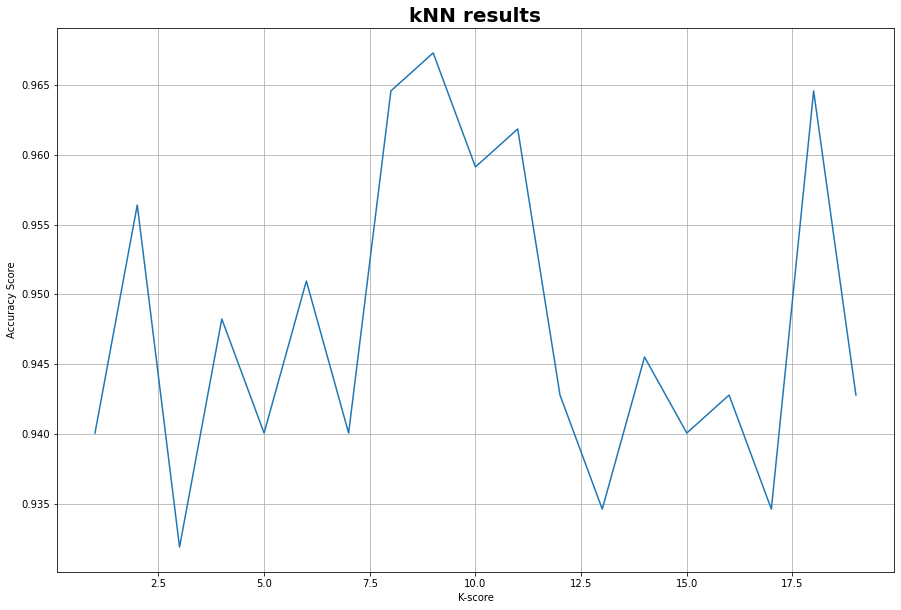

In [86]:
# Drawing performance graph based on K-values

plt.plot(K,accuracy_scores)
plt.grid(True)
plt.ylabel("Accuracy Score")
plt.xlabel("K-score")
plt.title("kNN results",size=20,fontweight="bold")

# Best score is when K=9.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [102]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

y = website_dummy["Type"]
X = website_dummy.drop("Type",axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y)

# Rescaling X_train and x_test
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred)

0.9645776566757494

In [ ]:
# Yes, we have acviheved even better performance by feature scaling our dataset.
# Still I do have questions.

# In the internet, there are lots of discussions going on about whether should we scale our whole
# dataset or only training dataset? 

# In this example, I first transformed my training dataset and then transformed my test dataset, 
# but this process is not 100% clear on my mind at this point like why did we do like this way?

# Couldn't we just convert entire cleaned dataset by using robustscaler?